# STDSR Assignment 3 Simulated Annealing

Tishkin Pavel DS18-01, p.tishkin@innopolis.university
Github: https://github.com/Pain122/STDSRAssignment3

In [1]:
import numpy as np
import pandas as pd
from geopy.distance import geodesic
import random
from matplotlib import pyplot as plt
from matplotlib import animation

# Reading Dataset

In [2]:
# Reading dataset
df = pd.read_csv('city/city.csv')
df.head()

,address,postal_code,country,federal_district,region_type,region,area_type,area,city_type,city,...,fias_level,capital_marker,okato,oktmo,tax_office,timezone,geo_lat,geo_lon,population,foundation_year
0,"Респ Адыгея, г Адыгейск",385200.0,Россия,Южный,Респ,Адыгея,NaN,NaN,г,Адыгейск,...,4,0,79403000000,79703000001,107,UTC+3,44.878414,39.190289,12689,1969
1,г Майкоп,385000.0,Россия,Южный,Респ,Адыгея,NaN,NaN,г,Майкоп,...,4,2,79401000000,79701000001,105,UTC+3,44.609827,40.100661,144055,1857
2,г Горно-Алтайск,649000.0,Россия,Сибирский,Респ,Алтай,NaN,NaN,г,Горно-Алтайск,...,4,2,84401000000,84701000001,400,UTC+7,51.958103,85.960324,62861,1830
3,"Алтайский край, г Алейск",658125.0,Россия,Сибирский,край,Алтайский,NaN,NaN,г,Алейск,...,4,0,1403000000,1703000001,2201,UTC+7,52.492251,82.779361,28528,1913
4,г Барнаул,656000.0,Россия,Сибирский,край,Алтайский,NaN,NaN,г,Барнаул,...,4,2,1401000000,1701000001,2200,UTC+7,53.347997,83.779806,635585,1730


In [3]:
# Getting top N=30 cities
cities = df.nlargest(30, 'population')
cities.head()

,address,postal_code,country,federal_district,region_type,region,area_type,area,city_type,city,...,fias_level,capital_marker,okato,oktmo,tax_office,timezone,geo_lat,geo_lon,population,foundation_year
509,г Москва,101000.0,Россия,Центральный,г,Москва,NaN,NaN,NaN,NaN,...,1,0,45000000000,45000000,7700,UTC+3,55.754047,37.620405,11514330,1147
786,г Санкт-Петербург,190000.0,Россия,Северо-Западный,г,Санкт-Петербург,NaN,NaN,NaN,NaN,...,1,0,40000000000,40000000,7800,UTC+3,59.939131,30.315900,4848742,1703
647,г Новосибирск,630000.0,Россия,Сибирский,обл,Новосибирская,NaN,NaN,г,Новосибирск,...,4,2,50401000000,50701000001,5400,UTC+7,55.028191,82.921149,1498921,1893
832,г Екатеринбург,620000.0,Россия,Уральский,обл,Свердловская,NaN,NaN,г,Екатеринбург,...,4,2,65401000000,65701000001,6600,UTC+5,56.838522,60.605491,1377738,1723
619,г Нижний Новгород,603000.0,Россия,Приволжский,обл,Нижегородская,NaN,NaN,г,Нижний Новгород,...,4,2,22401000000,22701000001,5200,UTC+3,56.324063,44.005391,1250615,1221


In [4]:
# Getting distances between cities
coords = pd.Series(zip(cities.geo_lat, cities.geo_lon))
distances = np.array([geodesic(x, y).km for x in coords for y in coords]).reshape((len(coords), len(coords)))
distances = pd.DataFrame(distances, columns = cities.address, index = cities.address)
distances.head()

address,г Москва,г Санкт-Петербург,г Новосибирск,г Екатеринбург,г Нижний Новгород,г Казань,г Самара,г Омск,г Челябинск,г Ростов-на-Дону,...,г Ульяновск,г Владивосток,г Ярославль,г Иркутск,г Тюмень,г Махачкала,г Хабаровск,г Оренбург,"Кемеровская область - Кузбасс, г Новокузнецк",г Кемерово
address,,,,,,,,,,,,,,,,,,,,,
г Москва,0.000000,636.023102,2820.332215,1421.458135,402.851779,720.322445,856.692064,2242.925451,1498.507786,960.207122,...,705.494964,6433.650168,250.409949,4215.405537,1716.047175,1587.618762,6159.258136,1230.161013,3130.320438,2992.064835
г Санкт-Петербург,636.023102,0.000000,3115.561708,1788.351068,899.158892,1202.045466,1421.458384,2592.807444,1915.678773,1542.721658,...,1254.944783,6555.733422,610.656143,4430.056673,2048.939619,2217.752551,6214.863736,1782.113705,3423.915349,3263.109543
г Новосибирск,2820.332215,3115.561708,0.000000,1402.777944,2419.804195,2121.800159,2135.792725,610.824700,1368.572605,3091.562536,...,2207.651036,3724.599004,2632.073424,1438.678154,1104.561165,2874.423327,3586.039149,1871.755002,310.671647,203.018579
г Екатеринбург,1421.458135,1788.351068,1402.777944,0.000000,1019.220612,719.820037,783.316417,822.972268,193.333538,1776.768158,...,819.952966,5078.714556,1248.822629,2819.971196,301.547407,1798.567958,4866.381788,666.162048,1711.506055,1581.554990
г Нижний Новгород,402.851779,899.158892,2419.804195,1019.220612,0.000000,323.438589,524.642020,1840.158338,1097.227614,1054.484280,...,356.730879,6053.358466,288.517956,3821.927297,1315.243458,1504.464626,5796.267673,883.238485,2729.436156,2593.627389


# Simulated Annealing

In [5]:
class Logger:
    def __init__(self):
        self.paths, self.temps, self.dists = [], [], []

    def log(self, path, T, dist):
        self.paths.append(path)
        self.temps.append(T)
        self.dists.append(dist)

In [6]:
class SA:
    def __init__(self, matrix, cooling, logger: Logger, st=1):
        self.logger = logger
        self.matrix = matrix
        total = len(matrix)
        self.total = total
        # sampling initial
        self.path = np.random.permutation(np.array(range(total)))
        # Setting initial temperature
        self.cooling = cooling
        self.st = st
        self.T = 240
        self.cost = self.dist(self.path)


    def step(self, path, cost):
        # Generating x'
        r = random.sample(set(path), 2)
        new_path = np.copy(path)
        new_path[r[0]], new_path[r[1]] = new_path[r[1]], new_path[r[0]]
        # Calculating new energy
        new_cost = self.dist(new_path)
        # Calculating acceptance ratio
        alpha = self.energy(new_cost-cost)
        if alpha >= np.random.uniform():
            return new_path, new_cost
        else:
            return path, cost

    def anneal(self):
        step = 0
        self.logger.log(self.path, self.T, self.cost)
        while self.T > 20:
            self.path, self.cost = self.step(self.path, self.cost)
            step+=1
            if self.st == step:
                self.T = self.T * self.cooling
                self.logger.log(self.path, self.T, self.cost)
                step = 0

    def energy(self, dist):
        return np.math.exp(-dist/self.T)

    def dist(self, path):
        return sum([self.matrix[x[0], x[1]] for x in zip(path[:-1], path[1:])]) + self.matrix[path[0], path[-1]]

# Tracking speed of convergence

In [7]:
l_slow = Logger()
slow_cooling = SA(distances.to_numpy(), 0.995, l_slow, 5)
l_fast = Logger()
fast_cooling = SA(distances.to_numpy(), 0.6, l_fast, 5)
l_middle = Logger()
middle_cooling = SA(distances.to_numpy(), 0.875, l_middle, 5)

In [8]:
slow_cooling.anneal()
fast_cooling.anneal()
middle_cooling.anneal()

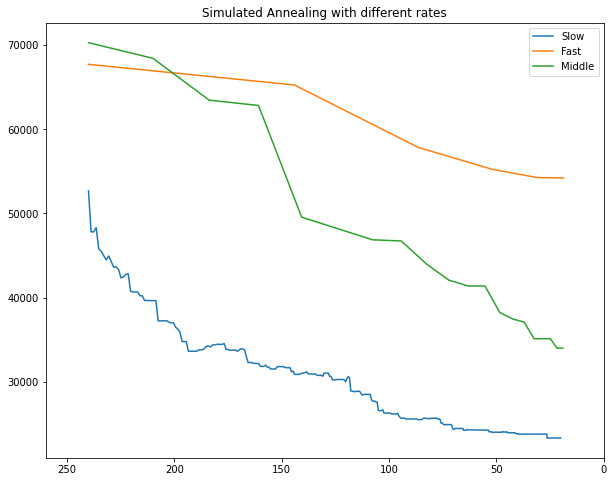

In [9]:
plt.rcParams["figure.figsize"] = (10, 8)
plt.title("Simulated Annealing with different rates")
plt.plot(l_slow.temps, l_slow.dists, label="Slow")
plt.plot(l_fast.temps, l_fast.dists, label="Fast")
plt.plot(l_middle.temps, l_middle.dists, label="Middle")
plt.xlim(260, 0)
plt.legend()
plt.show()

As we can see, the longer cooling process produces better results and the fastest stops to early. Middle is between the two, but it has less calculations than the Slow, while providing better result than Fast. Nonetheless, it is still significantly higher than Slow process.

# Visualizing the optimization process

In [10]:
paths, temps, dists = l_slow.paths, l_slow.temps, l_slow.dists

MovieWriter ffmpeg unavailable; using Pillow instead.


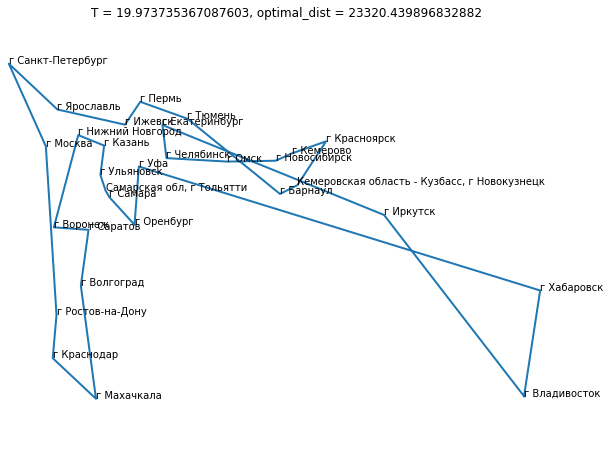

In [11]:
# Reference: https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/

fig = plt.figure()
ax = plt.axes(xlim=(30, 140), ylim=(40, 62))
plt.axis('off')
line, = ax.plot([], [], lw=2)
# Reference: https://stackoverflow.com/questions/12998430/remove-xticks-in-a-matplotlib-plot

for i, txt in enumerate(cities.address):
    ax.annotate(txt, (cities.geo_lon.iloc[i], cities.geo_lat.iloc[i]))

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = cities.geo_lon.iloc[paths[i]].tolist() + [cities.geo_lon.iloc[paths[i][0]].tolist()]
    y = cities.geo_lat.iloc[paths[i]].tolist() + [cities.geo_lat.iloc[paths[i][0]].tolist()]
    line.set_data(x, y)
    ax.title.set_text(f"T = {temps[i]}, optimal_dist = {dists[i]}")
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(paths), blit=True)

anim.save('cities.gif', fps=30)

![Alt Text](cities.gif)